In [3]:
import numpy as np
import pandas as pd


from datetime import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%matplotlib inline

import plotly.graph_objects as go

import plotly.io as pio


import seaborn as sns

import plotly

import dash
from dash import dcc
from dash import html

pd.set_option('display.max_rows', None)

mpl.rcParams['figure.figsize'] = (16, 9)

sns.set(style="darkgrid")

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Explorative Data Analysis

* Focus is often a visual representation of the data (better than only numbers that have no meaning)

In [2]:
rc_plot=pd.read_csv('../data/processed/COVID_population_relative_cases.csv', sep=';')
rc_plot.tail()

,date,United Kingdom,France,Belgium
882,2022-06-22,0.3385,0.4534,0.3631
883,2022-06-23,0.3387,0.4546,0.3643
884,2022-06-24,0.3390,0.4558,0.3643
885,2022-06-25,0.3390,0.4558,0.3643
886,2022-06-26,0.3390,0.4558,0.3643


# 1- Matplotlib Example (Static Visualization)
only for quick look of the Data, not an interactive Figure !

Text(0, 0.5, 'Relative Cases (Absolut Cases/Population)')

<Figure size 1152x648 with 0 Axes>

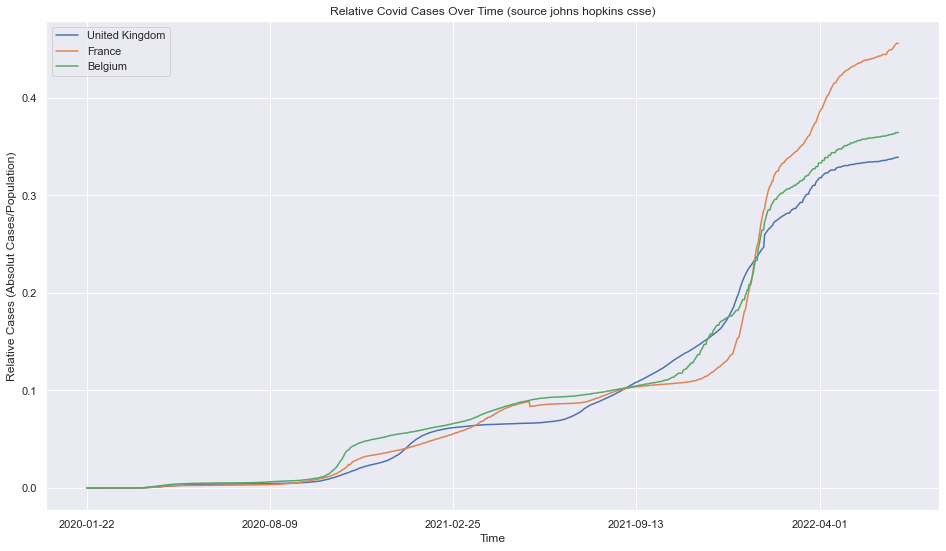

In [5]:
plt.figure();
ax=rc_plot.iloc[:,:].set_index('date').plot()
ax.set_title("Relative Covid Cases Over Time (source johns hopkins csse)")
ax.set_xlabel("Time")
ax.set_ylabel("Relative Cases (Absolut Cases/Population)")
#plt.savefig('relative_cases.jpg')

## Vaccination Data

In [6]:
vr_plot=pd.read_csv('../data/processed/Vaccination_percentage.csv', sep=';')
vr_plot.tail()

,date,United Kingdom,France,Belgium
533,2022-06-21,74.4866,78.4630,79.1449
534,2022-06-22,74.5056,78.4678,79.1449
535,2022-06-23,74.5056,78.4730,79.1476
536,2022-06-24,74.5056,78.4779,79.1476
537,2022-06-25,74.5056,78.4779,79.1476


<Figure size 1152x648 with 0 Axes>

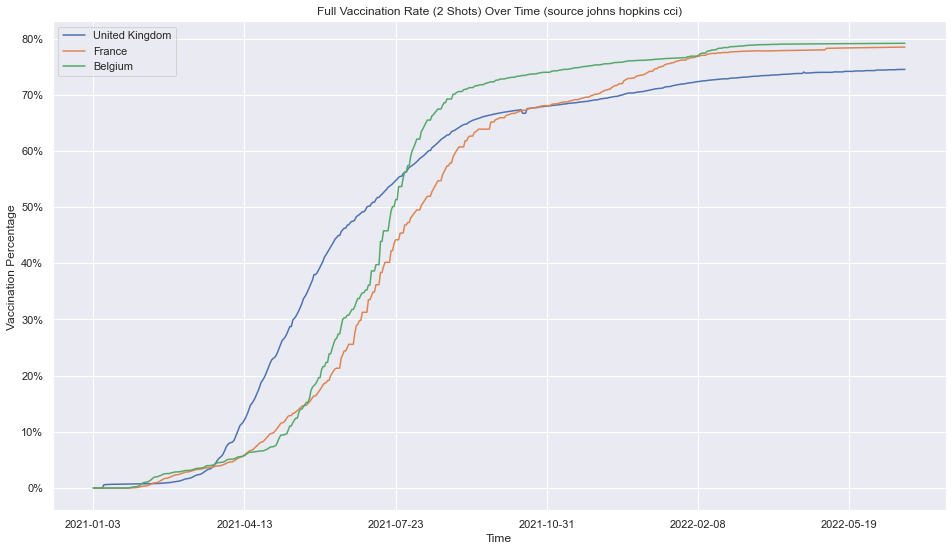

In [7]:
plt.figure();
ax=vr_plot.set_index('date').plot()
ax.set_title("Full Vaccination Rate (2 Shots) Over Time (source johns hopkins cci)")
ax.set_xlabel("Time")
ax.set_ylabel("Vaccination Percentage ")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
#plt.savefig('Vaccination_rate.jpg')

# 2- Plot.ly (Dynamic Plots)
for interactive plots

In [8]:
plotly.__version__

'5.6.0'

In [9]:
country_list=["United Kingdom","France","Belgium"]

In [17]:
fig=go.Figure()
## defines how to plot the individual trace
for each in country_list:
    fig.add_trace(go.Scatter(x=rc_plot.date,
                                y=rc_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=1,
                                marker_size=1, 
                                name=each
                                 )
                     )

## defines the overall layout properties
fig.update_layout(
    width=1000,
    height=700,
    xaxis_title="Time",
    title="Relative Covid Cases Over Time (source johns hopkins csse)",
    yaxis_title="Relative Cases (Absolut Cases/Population)",
)


fig.update_layout(xaxis_rangeslider_visible=False)
#fig.show(renderer='browser')
fig.show()
fig.write_image("Relative_cases.jpg")

## Vaccination

In [15]:
country_list=["United Kingdom","France","Belgium"]

In [24]:
fig=go.Figure()
## defines how to plot the individual trace
for each in country_list:
    fig.add_trace(go.Scatter(x=vr_plot.date,
                                y=vr_plot[each]/100,
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=1,
                                marker_size=1, 
                                name=each
                                 )
                     )

## defines the overall layout properties
fig.update_layout(
    width=1000,
    height=700,
    xaxis_title="Time",
    title="Full Vaccination Rate (2 Shots) Over Time (source johns hopkins cci)",
    yaxis_title="Vaccination Percentage",
)

fig.update_layout(yaxis_tickformat = '.1%',xaxis_rangeslider_visible=False)
#fig.show(renderer='browser')
fig.show()
fig.write_image("Vaccination_rate.jpg")

# 3- Dashboard

In [11]:

app = dash.Dash()
app.layout = html.Div([
    
    html.Label('Multi-Select Country'),
    
    dcc.Dropdown(
        id='country_drop_down',
        options=[
            {'label': 'United Kingdom', 'value': 'United Kingdom'},
            {'label': 'France', 'value': 'France'},
            {'label': 'Belgium', 'value': 'Belgium'}
        ],
        value=['France', 'Belgium'], # which are pre-selected
        multi=True
    ),   
    
    dcc.Graph(figure=fig, id='main_window_slope')
              ])

In [12]:
from dash.dependencies import Input, Output

@app.callback(
    Output('main_window_slope', 'figure'),
    [Input('country_drop_down', 'value')])
def update_figure(country_list):
    
    traces = [] 
    for each in country_list:
        traces.append(dict(x=rc_plot.date,
                                y=rc_plot[each],
                                mode='markers+lines',
                                opacity=0.9,
                                line_width=1,
                                marker_size=0.1, 
                                name=each
                        )
                )
        
    return {
            'data': traces,
            'layout': dict (
                width=1300,
                height=700,
                xaxis_title="Time",
                yaxis_title="Relative Covid Cases Over Time (source johns hopkins csse)",
                xaxis={'tickangle':-45,
                        'nticks':20,
                        'tickfont':dict(size=14,color="#7f7f7f"),
                        
                      },
                yaxis={'type':"linear",
                       'range':'[1.1,8]'
                      }
        )
    }


In [13]:
app.run_server(debug=True, use_reloader=False)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
